In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, fftpack
from matplotlib.colors import LogNorm
from matplotlib import patches

  1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

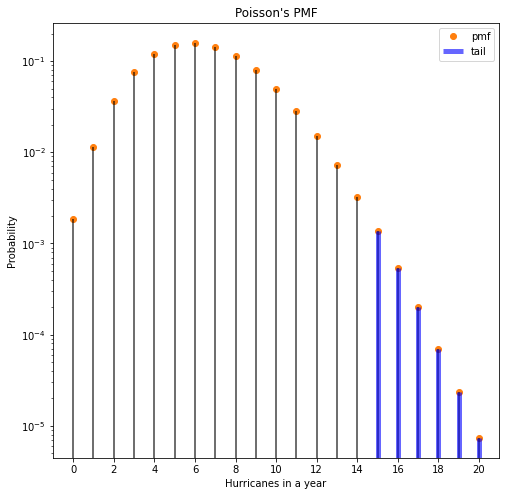

The probability that in a year 15 or more hurricanes happen is 2.22e-03
Null hypothesis (H0): The number of hurricanes is distributed according to a Poissonian with mean mu = 6.3

Case 1: alpha_1 = prob( Z ≥ Z_1 )
Z_1 = 3.00
The (one-sided) significance is alpha_1 = 1.35e-03
The null hypothesis of a random number of hurricanes is accepted, according to case 1.

Case 2: alpha_2 = prob( Z ≥ Z_2 )
Z_2 = (xs - mu)/sqrt(mu) = 3.47
The Z-score (used to compute the significance alpha_2) is computed supposing that the variance of the distribution is equal to mu.
The (one-sided) significance is alpha_2 = 2.64e-04
The null hypothesis of a random number of hurricanes is accepted, according to case 2.



In [2]:
xs = 15
mu = 6.3
x = np.arange(21)

# compute the probability of hurricanes in a year to be ≥ 15
# (to include the 15th we compute it with xs-.5)
# one-sided probability
prob_H0 = stats.poisson.sf(k=xs-.5, mu=mu)
fig, ax = plt.subplots(1, 1, figsize=(8,8))

# plot Poisson's PMF
ax.plot(x, stats.poisson.pmf(x, mu), 'o', label='pmf', c='C1')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='k', linestyles='-', lw=1.5, alpha=.75)
ax.vlines(x[xs:], 0, stats.poisson.pmf(x[xs:], mu), colors='blue', linestyles='-', lw=5, label='tail', alpha=.6)
ax.set_xlabel('Hurricanes in a year')
ax.set_ylabel('Probability')
ax.set_title("Poisson's PMF")
ax.set_xticks(np.arange(0,21,step=2))
ax.set_yscale("log")
ax.legend()
plt.show()
print("The probability that in a year %i or more hurricanes happen is %2.2e" % (xs, prob_H0))
print("Null hypothesis (H0): The number of hurricanes is distributed according to a Poissonian with mean mu = %2.1f\n" % mu)

# case 1:
# alpha_1 = prob( Z ≥ 3 ) (as the exercise question suggests)
# both the considered Poisson probability and Z-test significance are computed
# considering one-sided probabilities
Z_1 = 3
alpha_1 = stats.norm.sf(x=Z_1)
print("Case 1: alpha_1 = prob( Z ≥ Z_1 )\nZ_1 = %2.2f" % Z_1)
print("The (one-sided) significance is alpha_1 = %2.2e" % alpha_1)
print("The null hypothesis of a random number of hurricanes is "+ ("accepted" if prob_H0 > alpha_1 else "rejected") +", according to case 1.\n")

# case 2:
# alpha_2 = prob( Z ≥ (xs - mu)/sqrt(mu) )
# both the considered Poisson probability and Z-test significance are computed
# considering one-sided probabilities
Z_2 = (xs - mu)/np.sqrt(mu)
alpha_2 = stats.norm.sf(x=Z_2)
print("Case 2: alpha_2 = prob( Z ≥ Z_2 )\nZ_2 = (xs - mu)/sqrt(mu) = %2.2f" % Z_2)
print("The Z-score (used to compute the significance alpha_2) is computed supposing that the variance of the distribution is equal to mu.")
print("The (one-sided) significance is alpha_2 = %2.2e" % alpha_2)
print("The null hypothesis of a random number of hurricanes is "+ ("accepted" if prob_H0 > alpha_2 else "rejected") +", according to case 2.\n")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.99
Null hypothesis (H0): The change of blood pressure is not statistically significant.



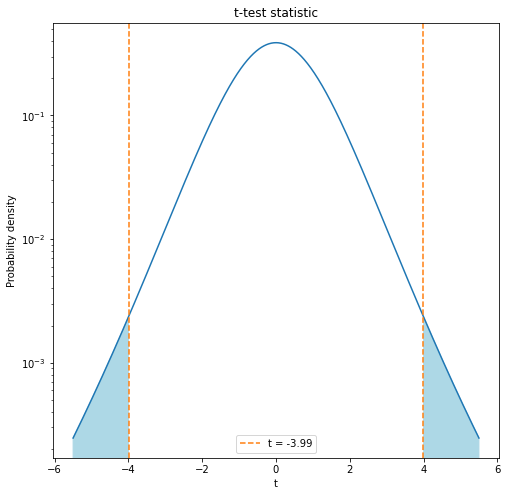

(two-sided) P-value = 3.15e-03
Significance alpha = 5.00e-02
The null hypothesis is rejected.



In [3]:
# data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)

# T statistic
mean_pre, std_pre = pre.mean(), pre.std()
mean_post, std_post = post.mean(), post.std()
sigma = np.sqrt(0.5*(std_pre**2 + std_post**2))
T = (mean_pre - mean_post)/(sigma * np.sqrt(2/n))
print("T = %2.2f" % T)
print("Null hypothesis (H0): The change of blood pressure is not statistically significant.\n")

# plot T statistic
fig, ax = plt.subplots(1, 1, figsize=(8,8))
x = np.linspace(-5.5, 5.5, 1000)
ax.plot(x, stats.t.pdf(x, n-1))
ax.fill_between(x, stats.t.pdf(x, n-1), where=np.abs(x) > np.abs(T), color='lightblue')
ax.axvline(T, linestyle='--', color='C1', label='t = '+str(round(T,2)))
ax.axvline(-T, linestyle='--', color='C1')
ax.set_ylabel("Probability density")
ax.set_xlabel("t")
ax.set_yscale("log")
ax.set_title("t-test statistic")
ax.legend()
plt.show()

# t-test and conclusions
pvalue = stats.t.cdf(T, n-1) + stats.t.sf(-T, n-1)
alpha = 0.05
print("(two-sided) P-value = %2.2e" % pvalue)
print("Significance alpha = %2.2e" % alpha)
print("The null hypothesis is "+ ("accepted" if pvalue > alpha else "rejected")+".\n")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [4]:
# read data
data = pd.read_csv("populations.txt", delimiter='\t')
data.columns = [w.replace("# ","") for w in data.columns]
print("data ="); display(data)

data =


,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


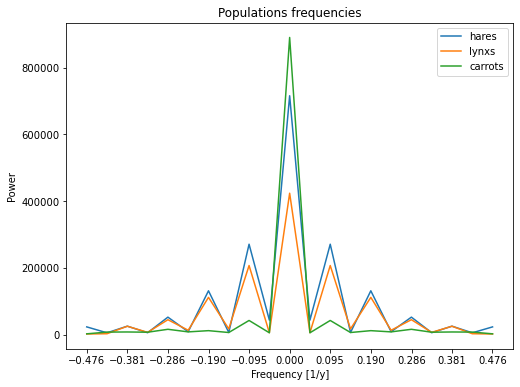

In [5]:
# perform periodicity analysis
time_step = 1.0 # year
hare_fft = fftpack.fft(data['hare'].values)
lynx_fft = fftpack.fft(data['lynx'].values)
carrot_fft = fftpack.fft(data['carrot'].values)
freq = fftpack.fftfreq(data.shape[0], d=time_step)

# plot (and shift the standard fft result for better visualization)
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_xlabel('Frequency [1/y]')
ax.set_ylabel('Power')
ax.set_title('Populations frequencies')
ax.set_xticks(np.round(fftpack.fftshift(freq)[::2], 3))
ax.plot(fftpack.fftshift(freq), fftpack.fftshift(np.abs(hare_fft)), label='hares')
ax.plot(fftpack.fftshift(freq), fftpack.fftshift(np.abs(lynx_fft)), label='lynxs')
ax.plot(fftpack.fftshift(freq), fftpack.fftshift(np.abs(carrot_fft)), label='carrots')
ax.legend()
plt.show()

In [6]:
# find the frequency of the second highest peak
# (the highest one is the one with zero frequency)
max_idx = np.argsort(np.abs(hare_fft))[-2]
T_period = 1 / np.abs(freq[max_idx])
print("The period of both hares and linxs populations is of %2.1f years." % (T_period))
print("The carrots have only one important peak at 0 frequency. That means that the carrots number is \n"
      "approximately constant. However, a small peak is visible for the frequency %2.3f [1/year].\n"
      "So, also the periodicity of hares and linxs populations affects the carrots population periodicity." % (1/T_period))

The period of both hares and linxs populations is of 10.5 years.
The carrots have only one important peak at 0 frequency. That means that the carrots number is 
approximately constant. However, a small peak is visible for the frequency 0.095 [1/year].
So, also the periodicity of hares and linxs populations affects the carrots population periodicity.


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

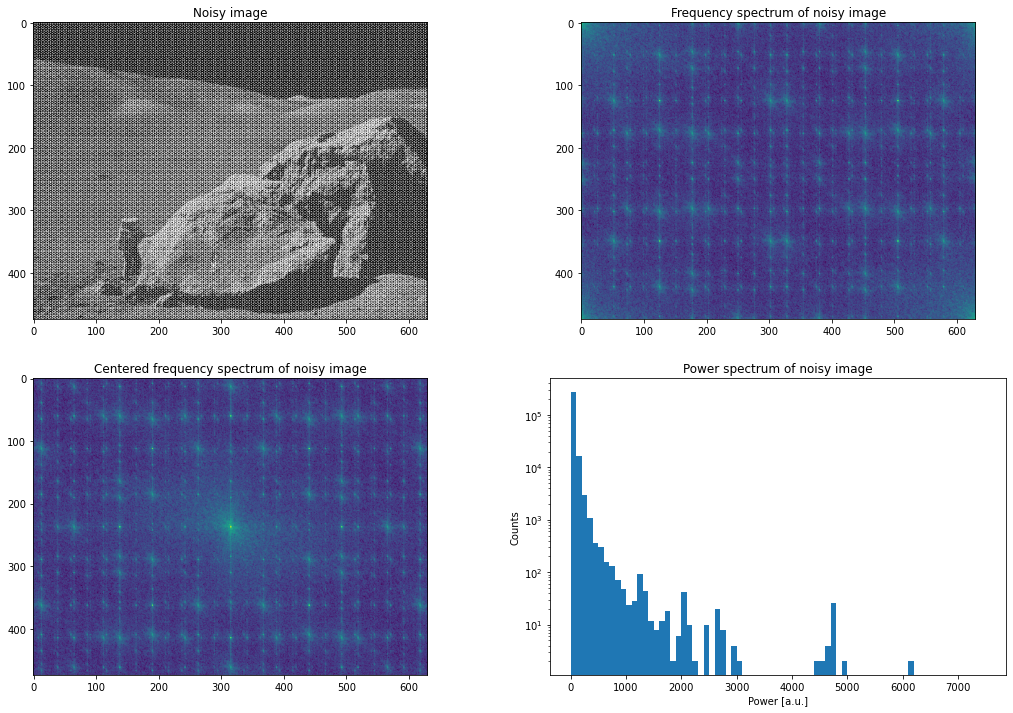

In [7]:
# import and view noisy image
noisy_img = plt.imread("moonlanding.png")
fig, axs = plt.subplots(2,2,figsize=(18,12))
axs[0,0].imshow(noisy_img, cmap='gray')
axs[0,0].set_title("Noisy image")

# perform 2D FFT and plot spectrum
noisy_img_fft = fftpack.fft2(noisy_img)
axs[0,1].imshow(np.abs(noisy_img_fft), norm=LogNorm(vmin=5))
axs[0,1].set_title("Frequency spectrum of noisy image")

# plot shifted (=centered) spectrum to see its central part
axs[1,0].imshow(np.abs(fftpack.fftshift(noisy_img_fft)), norm=LogNorm(vmin=5))
axs[1,0].set_title("Centered frequency spectrum of noisy image")

# plot histogram of occurencies in the frequency spectrum
axs[1,1].hist(np.abs(noisy_img_fft.ravel()), bins=75, log=True, range=(0,7500))
axs[1,1].set_xlabel("Power [a.u.]")
axs[1,1].set_ylabel("Counts")
axs[1,1].set_title("Power spectrum of noisy image")

plt.show()

**In the above frequency spectrum, the color of the image represents the absolute value of the power related to the 2D-frequency in the x-y axis. In the last histogram it is presented the counting of frequencies (on the y-axis) related to a particular power (on the x-axis).**

### Filter #1: Rectangle frequency filter

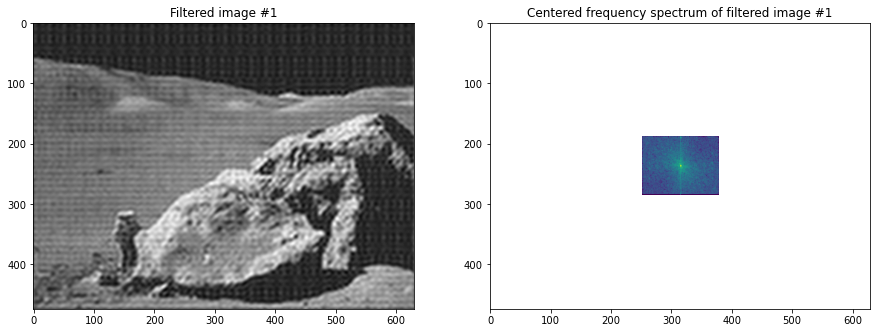

In [8]:
# frequencies spectrum
img_fft = noisy_img_fft.copy()
nrows,ncols = img_fft.shape
r = 0.1

# remove the higher frequencies and do the inverse FFT
# the filter is rectangle-shaped
img_fft[int(nrows*r):int(nrows*(1-r)),:] = 0
img_fft[:,int(ncols*r):int(ncols*(1-r))] = 0
clean_img = fftpack.ifft2(img_fft)

# plot results
fig, axs = plt.subplots(1,2,figsize=(15,8))
axs[0].imshow(np.real(clean_img), cmap='gray')
axs[0].set_title("Filtered image #1")

axs[1].imshow(np.abs(fftpack.fftshift(img_fft)), norm=LogNorm(vmin=5))
axs[1].set_title("Centered frequency spectrum of filtered image #1")

plt.show()

### Filter #2: Ellipse frequency filter

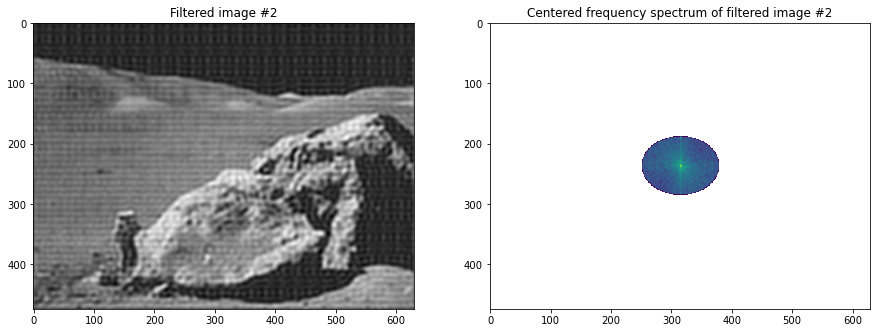

In [9]:
# frequencies spectrum
img_fft = noisy_img_fft.copy()
nrows,ncols = img_fft.shape
r = 0.1

# remove the higher frequencies and do the inverse FFT
# the filter is ellipse-shaped
shift_img_fft = fftpack.fftshift(img_fft)
pcenter = (np.array([nrows,ncols])-1)/2
X,Y = np.ogrid[:nrows,:ncols]
ellipse_mask = np.sqrt(((X-pcenter[0])/nrows)**2 + ((Y-pcenter[1])/ncols)**2)>r
shift_img_fft[ellipse_mask] = 0
img_fft = fftpack.ifftshift(shift_img_fft)
clean_img = fftpack.ifft2(img_fft)

# plot results
fig, axs = plt.subplots(1,2,figsize=(15,8))
axs[0].imshow(np.real(clean_img), cmap='gray')
axs[0].set_title("Filtered image #2")

axs[1].imshow(np.abs(shift_img_fft), norm=LogNorm(vmin=5))
axs[1].set_title("Centered frequency spectrum of filtered image #2")

plt.show()

### Filter #3: Rectangle frequency filter + power filter

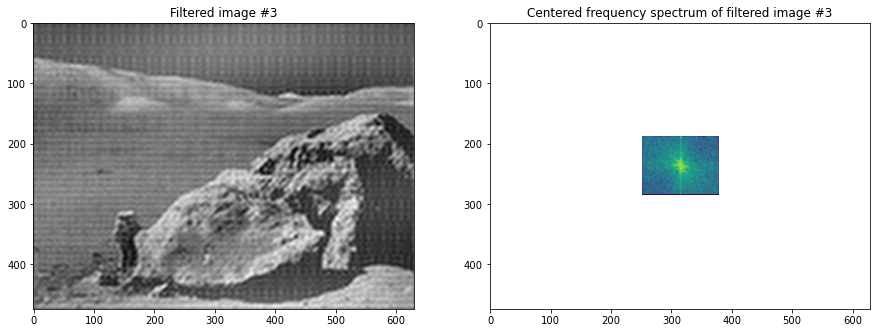

In [10]:
# frequencies spectrum
img_fft = noisy_img_fft.copy()
nrows,ncols = img_fft.shape
r = 0.1

# remove the higher frequencies and do the inverse FFT
# the filter is rectangle-shaped
# remove also the high power components
img_fft[int(nrows*r):int(nrows*(1-r)),:] = 0
img_fft[:,int(ncols*r):int(ncols*(1-r))] = 0
img_fft[np.abs(img_fft)>6000] = 0
clean_img = fftpack.ifft2(img_fft)

# plot results
fig, axs = plt.subplots(1,2,figsize=(15,8))
axs[0].imshow(np.real(clean_img), cmap='gray')
axs[0].set_title("Filtered image #3")

axs[1].imshow(np.abs(fftpack.fftshift(img_fft)), norm=LogNorm(vmin=5))
axs[1].set_title("Centered frequency spectrum of filtered image #3")

plt.show()

**Filters #1 and #2 lead to an image that is similar to the real one, even if some random noise is still present in the image. Instead, the power filter is not as effective in removing the random noise.**